In [38]:
%matplotlib inline
from matplotlib import pyplot as plt
import dataprob
import pandas as pd
import numpy as np

### Example model and data

Models should have the form:
```
def some_model(param1,param2,param3,...other_args,...other_kwargs):
    return observable
```

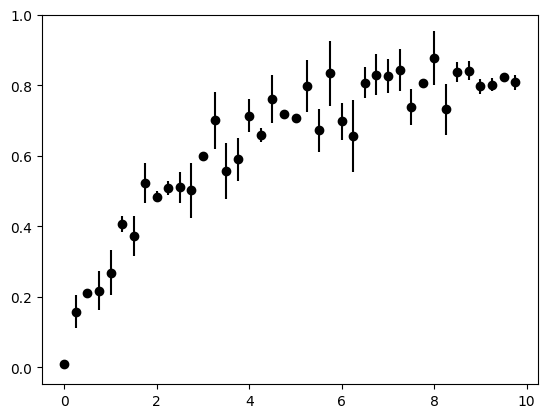

,X,Y,Y_stdev,residual,weighted_residual
0,0.00,0.010697,0.010697,0.010697,1.0
1,0.25,0.158333,0.047222,0.047222,1.0
2,0.50,0.209849,0.009849,0.009849,1.0
3,0.75,0.217865,0.054863,-0.054863,-1.0
4,1.00,0.268995,0.064339,-0.064339,-1.0


In [39]:
def binding_model(K,X=None):
    """
    Simple, saturating binding curve.

    K: association constant
    X: vector of X concentrations
    """

    return K*X/(1 + K*X)

df = pd.read_csv("binding-curves_noise-0.050.csv",index_col=0)

fig, ax = plt.subplots()
ax.errorbar(df.X,df.Y,yerr=df.Y_stdev,fmt="o",color="black")
plt.show()

df.head()

### Wrap the binding model

In [47]:
mw = dataprob.wrap_function(binding_model)
mw.X = df.X
print(mw.dataframe)
a = mw.dataframe
a["guess"] = 5
mw.dataframe = a
mw.dataframe

# mw.model()

  param name  guess  fixed  lower_bound  upper_bound  prior_mean  prior_std
0     K    K    0.0  False         -inf          inf         NaN        NaN


,param,name,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
0,K,K,5.0,False,-inf,inf,NaN,NaN


### Construct the fitter and do the fit

In [43]:
# Wrap the binding model and set the 'X' parameter
mw = dataprob.wrap_function(binding_model)
mw.X = df.X

# Create a fitter and indicate the model is mw
f = dataprob.MLFitter()
f.model = mw

# Find parameters of binding_model that maximize the likelihood of the
# seeing df.Y given df.X. 
f.fit(y_obs=df.Y)
f.fit_df

,param,estimate,stdev,low_95,high_95,guess,prior_mean,prior_std,lower_bound,upper_bound,fixed
0,K,0.493423,0.280837,-0.075103,1.061949,0.0,NaN,NaN,-inf,inf,False


In [36]:
f = dataprob.MLFitter()
f.fit(model=mw.model,guesses=[1.0],y_obs=df.Y,)
print(f.success)
print(f.estimate)
f.fit_df

True
[0.49342304]


,param,estimate,stdev,low_95,high_95,guess,prior_mean,prior_std,lower_bound,upper_bound,fixed
0,K,0.493423,0.280837,-0.075103,1.061949,1.0,NaN,NaN,-inf,inf,False


### Alternate way to construct fitter and do fit

In [ ]:
f = dataprob.MLFitter()
f.model = mw.model
f.guesses = [1]
f.y_obs = df.Y
f.fit()
print(f.success)
print(f.estimate)
f.fit_df

### Add weighted residuals

In [ ]:
f = dataprob.MLFitter()
f.fit(model=mw.model,y_obs=df.Y,y_stdev=df.Y_stdev)
print(f.success)
print(f.estimate)
f.fit_df

### Plotting

In [ ]:
# Plot the fit
fig, ax = plt.subplots()
ax.errorbar(df.X,df.Y,yerr=df.Y_stdev,fmt="o",color="black")
#ax.plot(df.X,mw.model(),"-",color='red')
ax.plot(df.X,mw.model(f.estimate),"-",color='red')

### Corner plot

In [ ]:
f.corner_plot()

### You can add parameter bounds and names

In [ ]:
mw.bounds

In [ ]:
f = dataprob.MLFitter()
f.model = mw.model
f.guesses = [1.0]
f.y_obs = df.Y
f.y_stdev = df.Y_stdev
f.bounds = [[0],[np.inf]]
f.param_names = ["Kx"]
f.fit()
print(f.success)
print(f.estimate)
f.fit_df

### Bayesian fitter

In [ ]:
f = dataprob.BayesianFitter()
f.fit(model=mw.model,guesses=[1.0],y_obs=df.Y,y_stdev=df.Y_stdev)
print(f.success)
print(f.estimate)
f.fit_df


In [ ]:
fig, ax = plt.subplots()
ax.errorbar(df.X,df.Y,yerr=df.Y_stdev,fmt="o",color="black")

# Plot 100 fits sampled from posterior
for i in range(0,len(f.samples),90):
    ax.plot(df.X,mw.model(f.samples[i,:]),"-",color='red',alpha=0.1)